In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [16]:
gpd.__version__

'0.13.2'

In [13]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [18]:
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


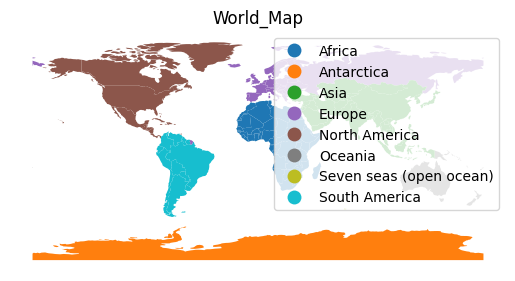

In [30]:
# fig, ax = plt.subplots(figsize=(10, 8)) 
ax = countries.plot(column ="continent",legend = True, categorical= True)
ax.set_title("World_Map")
ax.set_axis_off()
plt.show()

In [26]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [27]:
#1인당 GDP 계산
countries.loc[:,"GDP_PER_CAP"] = countries.loc[:,"gdp_md_est"]/countries.loc[:,"pop_est"]*100
countries
#md=million dollars , est = estimation, pop = population_임.


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,GDP_PER_CAP
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.617561
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.108916
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.150352
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",4.619471
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",6.529752
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.741183
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",0.890801
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",0.441745
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",1.739747


In [32]:
pip install mapclassify

  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/27/38/9ee51b78d134301c359b67ea6b493a9a60bca67ea044f8114387d0c4d7e7/mapclassify-2.6.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.2 MB 1.4 MB/s eta 0:00:31
     ---------------------------------------- 0.4/42.2 MB 6.8 MB/s eta 0:00:07
     - -------------------------------------- 1.1/42.2 MB 9.7 MB/s eta 0:00:05
     -- ------------------------------------- 2.3/42.2 MB 13.4 MB/s eta 0:00:03
     --- ------------------------------------ 3.4/42.2 MB 15.4 MB/s eta 0:00:03
     ---- ----------------------------------- 5.0/42.2 MB 19.0 MB/s eta 0:00:02
     ------ --------------------------------- 7.3/42.2 MB 23.4 MB/s eta 0:00:02
     --------- ----------------------------- 10.4/42.2 MB 32.7 MB/s eta 0:00:01
     ------------ -------------------------- 13.0/42.2 MB 46.9 MB/s eta 0:00:01
    

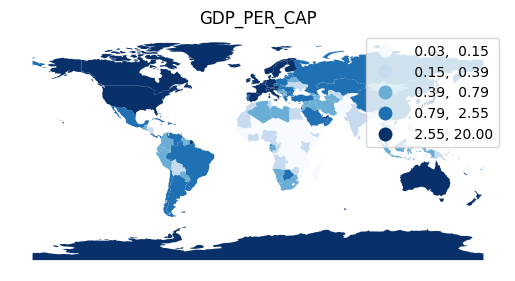

In [40]:
# fig, ax = plt.subplots(figsize=(10, 8))
ax = countries.plot(column ="GDP_PER_CAP",legend = True, scheme= "quantiles",cmap = "Blues",k =5,legend_kwds={'bbox_to_anchor': (1, 1)})
ax.set_title("GDP_PER_CAP")
ax.set_axis_off()
plt.show()

In [36]:
print(countries.geometry[40])

POLYGON ((-60.73357418480372 5.200277207861901, -60.601179165271944 4.91809804933213, -60.96689327660154 4.536467596856639, -62.08542965355913 4.162123521334308, -62.804533047116706 4.006965033377952, -63.093197597899106 3.7705711938587854, -63.88834286157416 4.020530096854571, -64.62865943058755 4.14848094320925, -64.81606401229402 4.056445217297423, -64.3684944322141 3.797210394705246, -64.40882788761792 3.126786200366624, -64.2699991522658 2.497005520025567, -63.42286739770512 2.4110676131241746, -63.368788011311665 2.200899562993129, -64.08308549666609 1.9163691267940803, -64.19930579289051 1.49285492594602, -64.61101192895987 1.3287305769870417, -65.35471330428837 1.0952822941085003, -65.54826738143757 0.7892544620760303, -66.32576514348496 0.7244522159820121, -66.87632585312258 1.253360500489336, -67.18129431829307 2.250638129074062, -67.44709204778631 2.6002808699608693, -67.8099381171237 2.820655015469569, -67.30317318385345 3.31845408773718, -67.33756384954368 3.54234223064172

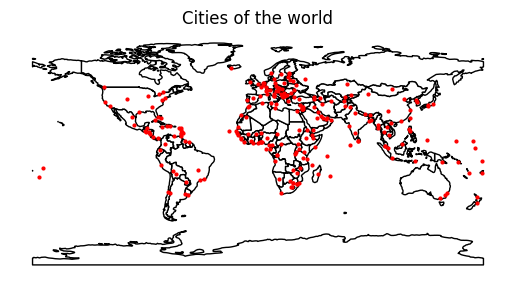

In [41]:
base = countries.plot(color = "white", edgecolor = "k")
ax = cities.plot(ax = base, marker = "o",color = "red", markersize =4)
ax.set_title("Cities of the world")
ax.set_axis_off()
plt.show()

In [43]:
korea_geometry = countries[countries["name"]=="South Korea"].geometry
korea_geometry

96    POLYGON ((126.17476 37.74969, 126.23734 37.840...
Name: geometry, dtype: geometry

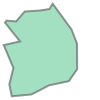

In [44]:
korea_geometry.squeeze()

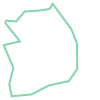

In [45]:
korea_geometry.boundary.squeeze()

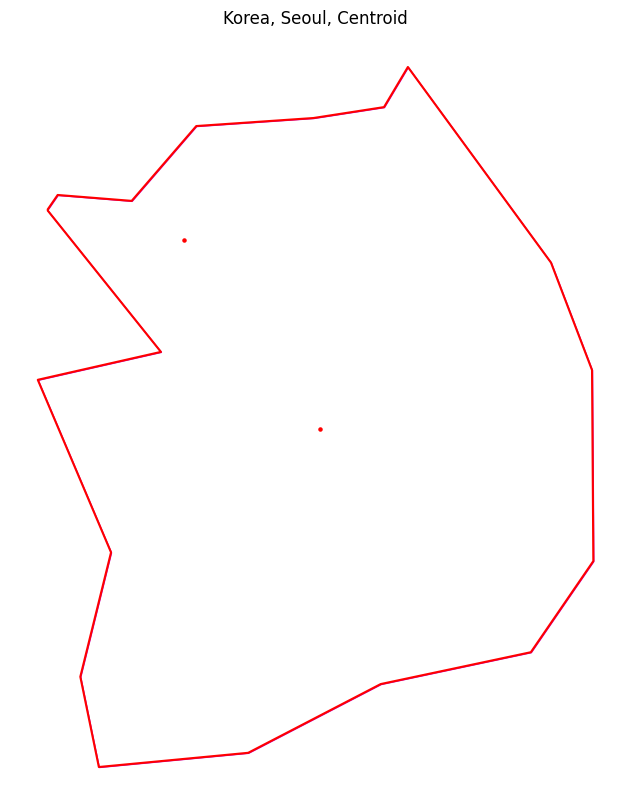

In [48]:
korea_boundary = korea_geometry.boundary.squeeze()
korea_centroid = korea_geometry.centroid.squeeze()
seoul = cities.loc[cities["name"] == "Seoul","geometry"].squeeze()

base = countries[countries["name"] == "South Korea"].plot(color = "white",edgecolor = "m", figsize = (10,10))

data = gpd.GeoSeries([korea_boundary, korea_centroid, seoul])
ax = data.plot(ax = base, marker = "o",color = "red",markersize = 5)

ax.set_title("Korea, Seoul, Centroid")
ax.set_axis_off()
plt.show()